# Demonstration of the BuTools Queues package

Set the precision and import the necessary packages

In [1]:
%precision %g
%run "~/github/butools/Python/BuToolsInit.py"

Butools V2.0
Packages loaded: utils, mc, moments, reptrans, trace, ph, dph, map, dmap, fitting, mam, queues
Global variables: 
butools.verbose = False , butools.checkInput = True , butools.checkPrecision = 1e-12


The BuTools Queues package supports two different kind of queues:
* discrete state queues, where the jobs (customers) are discrete,
* continuous state queues, where the jobs (customers) are infinitesimally small fluid drops.

## Discrete queues

### The MAP/MAP/1 queue

The most basic queue is the MAP/MAP/1 queue, which is defined by 2 MAPs: $(D_0,D_1)$ generates the arrivals, $(S_0,S_1)$ the service times.

In [2]:
D0 = ml.matrix([[-8., 1., 2.],[0., -6., 4.],[3., 0., -3.]])
D1 = ml.matrix([[4., 1., 0.],[0., 2., 0.],[0., 0., 0.]])
S0 = ml.matrix([[-10., 4.],[0., -7.]])
S1 = ml.matrix([[5., 1.],[4., 3.]])

All performance measures are calculated by the **MAPMAP1** function. After specifying the arrival and service MAP, the required performance measures are listed, and the function gives them back in the same order as requested. For example, the distribution of the number of customers in the system up to level 10 and the first 5 moments of the number of customers in the system are obtained as

In [3]:
ncd, ncm = MAPMAP1(D0, D1, S0, S1, "ncDistr", 11, "ncMoms", 5)
print("distribution=",ncd)
print("moments=",ncm)

distribution= [  6.76969093e-01   1.88906015e-01   7.95098846e-02   3.25628154e-02
   1.31820081e-02   5.30870154e-03   2.13277062e-03   8.55833552e-04
   3.43222964e-04   1.37603057e-04   5.51577667e-05]
moments= [0.54863953186413617, 1.3060488095463447, 4.3570044249027839, 19.192953582041419, 105.38633755592997]


The distribution of the number of customers in a MAP/MAP/1 queue is discrete phase-type (DPH), it is possible to obtain the parameters of the PH as well

In [4]:
alphap, Ap = MAPMAP1(D0, D1, S0, S1, "ncDistrDPH")
print("alpha=",alphap)
print("A=",Ap)

alpha= [[ 0.06713337  0.07532832  0.04070001  0.04705391  0.03573592  0.05707938]]
A= [[ 0.28130241  0.04629223  0.00761264  0.00344557  0.          0.        ]
 [ 0.1055167   0.33506431  0.00835481  0.01222992  0.          0.        ]
 [ 0.17544233  0.04581069  0.13665561  0.01056275  0.          0.        ]
 [ 0.07984336  0.20353241  0.04226532  0.16551629  0.          0.        ]
 [ 0.20817723  0.09182641  0.05939033  0.01351607  0.          0.        ]
 [ 0.13250054  0.20873513  0.03479216  0.06576387  0.          0.        ]]


The moments and the distribution can be obtained by the PmfFromDPH and MomentsFromDPH functions of the DPH package. One of the main strengths of BuTools is that the packages play together nicely.

In [5]:
print("distribution=",PmfFromDPH(alphap,Ap,np.arange(11)))
print("moments=",MomentsFromDPH(alphap,Ap,5))

distribution= [  6.76969093e-01   1.88906015e-01   7.95098846e-02   3.25628154e-02
   1.31820081e-02   5.30870154e-03   2.13277062e-03   8.55833552e-04
   3.43222964e-04   1.37603057e-04   5.51577667e-05]
moments= [0.54863953186413628, 1.3060488095463452, 4.3570044249027857, 19.192953582041422, 105.38633755593]


Let us plot the distribution.

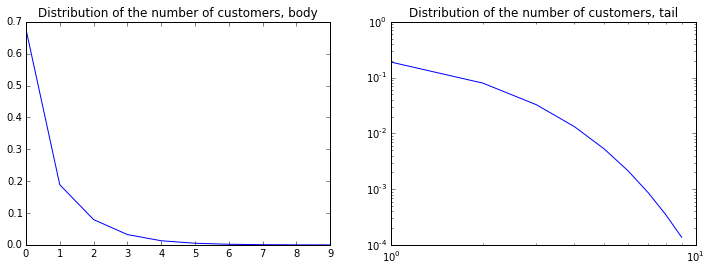

In [6]:
ncd = MAPMAP1(D0, D1, S0, S1, "ncDistr", 10)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Distribution of the number of customers, body")
plt.plot(ncd)
plt.subplot(122)
plt.title("Distribution of the number of customers, tail")
plt.loglog(ncd);

Note that the matrix-geometric representation of the distribution of the number of customers can be obtained as well, which is somewhat more stable numerically than the DPH one. In this case we have

In [7]:
alpha, A = MAPMAP1(D0, D1, S0, S1, "ncDistrMG")
print("distribution=",PmfFromMG(alpha,A,np.arange(11)))
print("moments=",MomentsFromMG(alpha,A,5))

distribution= [  6.76969093e-01   1.88906015e-01   7.95098846e-02   3.25628154e-02
   1.31820081e-02   5.30870154e-03   2.13277062e-03   8.55833552e-04
   3.43222964e-04   1.37603057e-04   5.51577667e-05]
moments= [0.54863953186413594, 1.3060488095463438, 4.3570044249027813, 19.192953582041405, 105.38633755592987]


The sojourn time of customers is PH distributed as well. The moments and the cdf at the given points can be obtained either directly as

In [8]:
points = np.arange(0.,1.1,0.1)
std, stm = MAPMAP1(D0, D1, S0, S1, "stDistr", points, "stMoms", 3)
print("distribution=",std)
print("moments=",stm)

distribution= [  1.11022302e-16   3.12202005e-01   5.31969389e-01   6.83448493e-01
   7.86668498e-01   8.56546935e-01   9.03671626e-01   9.35376392e-01
   9.56674470e-01   9.70967143e-01   9.80551790e-01]
moments= [0.25907977893584216, 0.1314530565761404, 0.099109779753652538]


...or by requesting the parameters of the PH (or ME) distribution as well:

In [9]:
alphap, Ap = MAPMAP1(D0, D1, S0, S1, "stDistrPH")
print("distribution=",CdfFromPH(alphap,Ap,points))
print("moments=",MomentsFromPH(alphap,Ap,3))

distribution= [ 0.          0.312202    0.53196939  0.68344849  0.7866685   0.85654694
  0.90367163  0.93537639  0.95667447  0.97096714  0.98055179]
moments= [0.25907977893584228, 0.13145305657614043, 0.099109779753652566]


In [10]:
alpha, A = MAPMAP1(D0, D1, S0, S1, "stDistrME")
print("distribution=",CdfFromME(alpha,A,points))
print("moments=",MomentsFromME(alpha,A,3))

distribution= [  1.11022302e-16   3.12202005e-01   5.31969389e-01   6.83448493e-01
   7.86668498e-01   8.56546935e-01   9.03671626e-01   9.35376392e-01
   9.56674470e-01   9.70967143e-01   9.80551790e-01]
moments= [0.25907977893584216, 0.1314530565761404, 0.099109779753652524]


Check if Little's law holds, thus $E(X)=\lambda E(T)$, where E(X) is the mean number of customers, and E(T) is the mean sojourn time

In [11]:
lambd = 1./MarginalMomentsFromMAP(D0,D1,1)[0]
print("Mean number of customers = ", ncm[0])
print("Mean sojourn time * lambda = ", stm[0]*lambd)

Mean number of customers =  0.548639531864
Mean sojourn time * lambda =  0.548639531864


Plot the pdf of the sojourn time

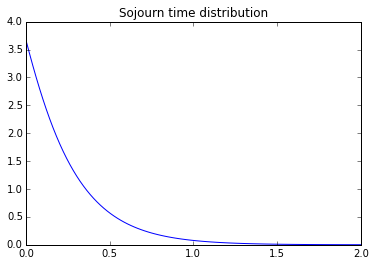

In [12]:
xp = np.linspace(0,2,100)
yp = PdfFromPH(alpha, A, xp)
plt.title("Sojourn time distribution")
plt.plot(xp,yp);

Again, any performance measures can be requested in a single function call, this way the time (and memory) consuming  repeated calculation of several quantities can be avoided.

In [13]:
stm, ncm, alpha, A,ncd = MAPMAP1 (D0, D1, S0, S1, "stMoms", 3, "ncMoms", 4, "stDistrME", "ncDistr", 20)

Note that if the arrival and/or service times are PH distributed, the MAPMAP1 function can still solve the system. Below a PH/PH/1 queue is solved, where the arrival times are given by PH $(\delta,D)$ and the service times by $(\sigma,S)$:

In [14]:
delta = ml.matrix([[0.5,0.1,0.4]])
D = ml.matrix([[-8., 1., 2.],[0., -6., 4.],[3., 0., -3.]])
sigma = ml.matrix([[0.2,0.7,0.1]])
S = ml.matrix([[-10., 4., 0.],[5., -7., 2.],[1., 2., -8.]])
D0 = D
D1 = np.sum(-D,1)*delta
S0 = S
S1 = np.sum(-S,1)*sigma
stm, ncm, alpha, A,ncd = MAPMAP1 (D0, D1, S0, S1, "stMoms", 3, "ncMoms", 4, "stDistrME", "ncDistr", 20)

### The QBD queue

The QBD queues are obtained by interpreting a QBD process as a queue: level forward transitions are interpreted as arrivals, level backward transitions as services. QBD queues are more general than MAP/MAP/1 queues, since the arrival and service processes are independent.

The analysis of QBD queues is done by the **QBDQueue** function, which is parameterized exactly as the MAPMAP1 function above.

In [15]:
B = ml.matrix([[0., 0.],[3., 4.]])
F = ml.matrix([[1., 0.],[2., 0.]])
L = ml.matrix([[-6., 5.],[3., -12.]])
L0 = ml.matrix([[-6., 5.],[6., -8.]])

In [16]:
ncd, ncm = QBDQueue(B, L, F, L0, "ncDistr", 11, "ncMoms", 5)
alphap, Ap = QBDQueue(B, L, F, L0, "ncDistrDPH")
alpha, A = QBDQueue(B, L, F, L0, "ncDistrMG")
std, stm = QBDQueue(B, L, F, L0, "stDistr", np.arange(0.,1.1,0.1), "stMoms", 5)
betap, Bp = QBDQueue(B, L, F, L0, "stDistrPH")
betame, Bme = QBDQueue(B, L, F, L0, "stDistrME")

Again, any number of performance measures can be requested in any order in a single function call.

Let us plot the distribution of the number of customers and the density of the sojourn time:

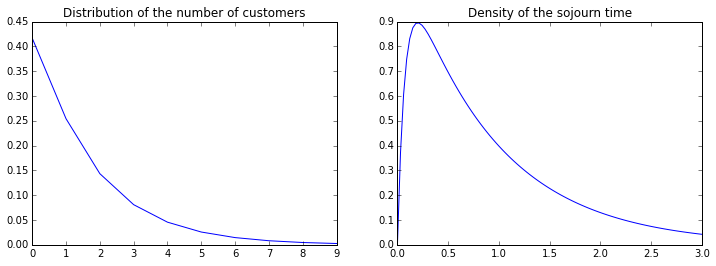

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Distribution of the number of customers")
ncd = QBDQueue(B, L, F, L0, "ncDistr", 10)
plt.plot(ncd)
plt.subplot(122)
plt.title("Density of the sojourn time")
stdx = np.linspace (0,3,100)
stdy = PdfFromME(betame,Bme,stdx)
plt.plot(stdx,stdy);

Note that the PH distribution of the sojourn time in case of QBD queues is much larger that the one of MAP/MAP/1 queues (size $N^2$ vs. size $N$). Thus, if the arrival and service processes are independent, the MAP/MAP/1 solver should be used.

### Multi-type MMAP[K]/PH[K]/1 queue

In this model there are several (K) customer types. The arrival process is a MMAP, and the different customer types have different (PH) service time distributions.

In [18]:
D0 = ml.matrix([[-5.49, 0., 1.15, 0.],[0., -2.29, 0., 0.],[0., 0.08, -1.32, 0.],[0.72, 1.17, 0.7, -7.07]])
D1 = ml.matrix([[0.25, 0.38, 0.64, 0.],[0., 0., 0., 1.09],[0., 1.24, 0., 0.],[0.37, 0., 0., 0.]])
D2 = ml.matrix([[0.3, 1.0, 0., 0.48],[0., 0.2, 0., 0.],[0., 0., 0., 0.],[0.61, 0., 0., 0.2]])
D3 = ml.matrix([[0., 0.98, 0., 0.31],[0., 0., 1.0, 0.],[0., 0., 0., 0.],[1.1, 0.84, 0.33, 1.03]])
sigma1 = ml.matrix([[0.25,0.75]])
S1 = ml.matrix([[-2.5, 2.5],[0., -10.]])
sigma2 = ml.matrix([[1.]])
S2 = ml.matrix([[-2.]])
sigma3 = ml.matrix([[0.83333,0.11404,0.05263]])
S3 = ml.matrix([[-3., 0., 0.],[0.73077, -0.73077, 0.],[0., 0.5, -0.5]])

The function solving the system is **MMAPPH1FCFS**. The parameters are the same as we saw before. First the moments and the distribution of the number of customers is calculated for each customer type.

In [19]:
ncm1, ncd1, ncm2, ncd2, ncm3, ncd3 = MMAPPH1FCFS([D0, D1, D2, D3], [sigma1, sigma2, sigma3], [S1, S2, S3], "ncMoms", 3, "ncDistr", 15)

The DPH and MG representation for the number of customers in the system is not available (yet). However, PH and ME representations are available for the sojourn time distribution, as well as the direct computation of the cdf and the moments:

In [20]:
distrPoints = [1., 5., 10.]
stm1, std1, stm2, std2, stm3, std3 = MMAPPH1FCFS([D0, D1, D2, D3], [sigma1, sigma2, sigma3], [S1, S2, S3], "stMoms", 3, "stDistr", distrPoints)
betap1, Bp1, betap2, Bp2, betap3, Bp3 = MMAPPH1FCFS([D0, D1, D2, D3], [sigma1, sigma2, sigma3], [S1, S2, S3], "stDistrPH")
beta1, B1, beta2, B2, beta3, B3 = MMAPPH1FCFS([D0, D1, D2, D3], [sigma1, sigma2, sigma3], [S1, S2, S3], "stDistrME")

Plotting the distribution of the number of customers in the system and the sojourn time can be done by the following code.

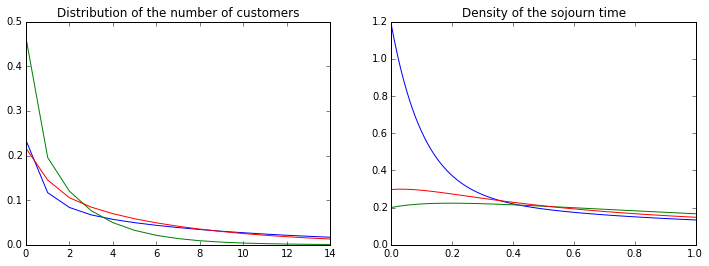

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Distribution of the number of customers")
x = np.arange(15)
plt.plot(x,ncd1,x,ncd2,x,ncd3)
plt.subplot(122)
plt.title("Density of the sojourn time")
stdx = np.linspace (0,1,100)
stdy1 = PdfFromME(beta1,B1,stdx)
stdy2 = PdfFromME(beta2,B2,stdx)
stdy3 = PdfFromME(beta3,B3,stdx)
plt.plot(stdx,stdy1,stdx,stdy2,stdx,stdy3);

Finally, we check the Little formula for each class.

In [22]:
lambd1 = 1./MarginalMomentsFromMAP(D0+D2+D3,D1,1)[0]
lambd2 = 1./MarginalMomentsFromMAP(D0+D1+D3,D2,1)[0]
lambd3 = 1./MarginalMomentsFromMAP(D0+D1+D2,D3,1)[0]
print("lambda1*E(T1) - E(X1) = ", ncm1[0]-stm1[0]*lambd1)
print("lambda2*E(T2) - E(X2) = ", ncm2[0]-stm2[0]*lambd2)
print("lambda3*E(T3) - E(X3) = ", ncm3[0]-stm3[0]*lambd3)

lambda1*E(T1) - E(X1) =  -4.79616346638e-14
lambda2*E(T2) - E(X2) =  -1.1990408666e-14
lambda3*E(T3) - E(X3) =  -3.73034936274e-14


### Priority Queues

BuTools has a unique tool: it implements the state-of-the art algorithms for solving the MMAP[K]/PH[K]/1 priority queues, both with preemptive resume and with non-preemptive service. The results are exact, and the solution time is reasonable.

Let us define an example with 3 classes of customers:

In [23]:
D0 = ml.matrix([[-5.49, 0., 1.15, 0.],[0., -2.29, 0., 0.],[0., 0.08, -1.32, 0.],[0.72, 1.17, 0.7, -7.07]])
D1 = ml.matrix([[0.25, 0.38, 0.64, 0.],[0., 0., 0., 1.09],[0., 1.24, 0., 0.],[0.37, 0., 0., 0.]])
D2 = ml.matrix([[0.3, 1.0, 0., 0.48],[0., 0.2, 0., 0.],[0., 0., 0., 0.],[0.61, 0., 0., 0.2]])
D3 = ml.matrix([[0., 0.98, 0., 0.31],[0., 0., 1.0, 0.],[0., 0., 0., 0.],[1.1, 0.84, 0.33, 1.03]])
sigma1 = ml.matrix([[0.25,0.75]])
S1 = ml.matrix([[-2.5, 2.5],[0., -10.]])
sigma2 = ml.matrix([[1.]])
S2 = ml.matrix([[-2.]])
sigma3 = ml.matrix([[0.83333,0.11404,0.05263]])
S3 = ml.matrix([[-3., 0., 0.],[0.73077, -0.73077, 0.],[0., 0.5, -0.5]])

The performance measures are obatined by the **MMAPPH1PRPR** for the preemptive resume service. The parameters are exactly the same as in the previous multi-type FCFS case. The number of customers in the system is not DPH/MG distributed, and the service times are not PH/ME distributed, thus the distributions and the moments can be obtained in a direct way only.

The number of customers (both the distribution and the moments) are returned quickly.

In [24]:
ncm1, ncd1, ncm2, ncd2, ncm3, ncd3 = MMAPPH1PRPR([D0, D1, D2, D3], [sigma1, sigma2, sigma3], [S1, S2, S3], "ncMoms", 3, "ncDistr", 50)

Let us plot it:

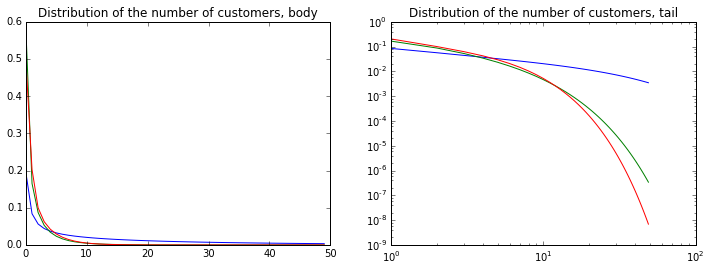

In [25]:
x = np.arange(50)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Distribution of the number of customers, body")
plt.plot(x,ncd1,x,ncd2,x,ncd3)
plt.subplot(122)
plt.title("Distribution of the number of customers, tail")
plt.loglog(x,ncd1,x,ncd2,x,ncd3);

The sojourn time distribution needs more effort to compute, but the moments are returned instantly.

In [26]:
distrPoints = [1., 5., 10.]
stm1, std1, stm2, std2, stm3, std3 = MMAPPH1PRPR([D0, D1, D2, D3], [sigma1, sigma2, sigma3], [S1, S2, S3], "stMoms", 3, "stDistr", distrPoints)
print("sojourn time moments, class1: ", stm1)
print("sojourn time moments, class2: ", stm2)
print("sojourn time moments, class3: ", stm3)
print("sojourn time cdf, class1: ", std1)
print("sojourn time cdf, class2: ", std2)
print("sojourn time cdf, class3: ", std3)

sojourn time moments, class1:  [16.306011640793987, 806.62985258583274, 65397.232945356853]
sojourn time moments, class2:  [5.505255217664927, 107.77744442363372, 3848.0354975571686]
sojourn time moments, class3:  [1.9703276379879364, 11.741190396361684, 112.84868513581137]
sojourn time cdf, class1:  [ 0.22163641  0.43134402  0.56865469]
sojourn time cdf, class2:  [ 0.343457    0.69323814  0.8313128 ]
sojourn time cdf, class3:  [ 0.55656947  0.88197026  0.97479216]


The Little formula holds for this system as well:

In [27]:
lambd1 = 1./MarginalMomentsFromMAP(D0+D2+D3,D1,1)[0]
lambd2 = 1./MarginalMomentsFromMAP(D0+D1+D3,D2,1)[0]
lambd3 = 1./MarginalMomentsFromMAP(D0+D1+D2,D3,1)[0]
print("lambda1*E(T1) - E(X1) = ", ncm1[0]-stm1[0]*lambd1)
print("lambda2*E(T2) - E(X2) = ", ncm2[0]-stm2[0]*lambd2)
print("lambda3*E(T3) - E(X3) = ", ncm3[0]-stm3[0]*lambd3)

lambda1*E(T1) - E(X1) =  -1.06581410364e-14
lambda2*E(T2) - E(X2) =  -1.7763568394e-15
lambda3*E(T3) - E(X3) =  4.88498130835e-15


The non-preemptive case is similar, but the corresponding function is **MMAPPH1NPPR**.

Let us now compare the three multi-type scheduling policies: FCFS, preemptive pesume priority, and non-preemptive priority.

In [28]:
stm1fcfs, std1fcfs, stm2fcfs, std2fcfs, stm3fcfs, std3fcfs = MMAPPH1FCFS([D0, D1, D2, D3], [sigma1, sigma2, sigma3], [S1, S2, S3], "ncMoms", 3, "ncDistr", 20)
stm1prpr, std1prpr, stm2prpr, std2prpr, stm3prpr, std3prpr = MMAPPH1PRPR([D0, D1, D2, D3], [sigma1, sigma2, sigma3], [S1, S2, S3], "ncMoms", 3, "ncDistr", 20)
stm1nppr, std1nppr, stm2nppr, std2nppr, stm3nppr, std3nppr = MMAPPH1NPPR([D0, D1, D2, D3], [sigma1, sigma2, sigma3], [S1, S2, S3], "ncMoms", 3, "ncDistr", 20)

Comparing the distribution of the number of customers gives:

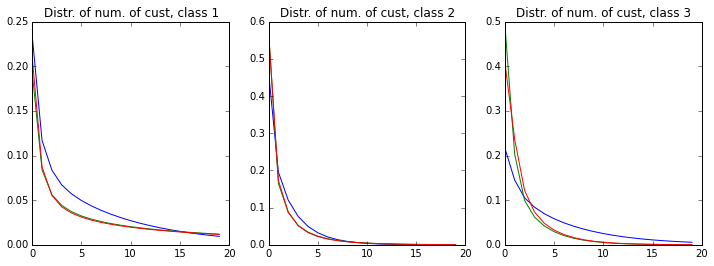

In [29]:
x = np.arange(20)
plt.figure(figsize=(12,4))
ax = plt.subplot(131)
plt.title("Distr. of num. of cust, class 1")
ax.plot(x,std1fcfs)
ax.plot(x,std1prpr)
ax.plot(x,std1nppr)
ax=plt.subplot(132)
plt.title("Distr. of num. of cust, class 2")
ax.plot(x,std2fcfs)
ax.plot(x,std2prpr)
ax.plot(x,std2nppr)
ax=plt.subplot(133)
plt.title("Distr. of num. of cust, class 3")
ax.plot(x,std3fcfs)
ax.plot(x,std3prpr)
ax.plot(x,std3nppr);

The distribution of the two priority policies are not too different. The mean values can tell more:

In [30]:
moms=[[stm1fcfs[0],stm1prpr[0],stm1nppr[0]],[stm2fcfs[0],stm2prpr[0],stm2nppr[0]],[stm3fcfs[0],stm3prpr[0],stm3nppr[0]]]
moms

[[6.46063, 18.0173, 17.5782],
 [1.51261, 1.30905, 1.27772],
 [4.87345, 1.49782, 1.71435]]

For the first customer type (first row), the FCFS is the most beneficial (first column), and the preemptive priority is the worst. As expected, for the highest priority class (type 3, third row), the preemptive priority leads to the lowest number of customers.

## Continuous queues

In case of continuous queues there is a fluid storage that plays the role of the queue. The input (arrival) and output (service) rates of the fluid are Markov-modulated.

### Fluid Queues

In a fluid queue the input and the output fluid rates are modulated by the same (continuous time) Markov chain. The generator of the Markov chain is $Q$. The diagonal matrices holding the input and output fluid rates in various states of the background process are denoted by $R_{in}$ and $R_{out}$, respectively. Obviously, both $R_{in}$ and $R_{out}$ are non-negative matrices.

In [31]:
Q = ml.matrix([[-9., 2., 4., 0., 1., 2.],[6., -25., 5., 3., 7., 4.],[1., 3., -4., 0., 0., 0.],[0., 0., 0., -8., 3., 5.],[7., 3., 0., 2., -13., 1.],[7., 8., 0., 3., 8., -26.]])
Rin = Diag(ml.matrix([[4.,2.,1.,0.,0.,3.]]))
Rout = Diag(ml.matrix([[6.,2.,0.,0.,3.,2.]]))

The performance measures are calculated by the **FluidQueue** function. The supported performance measures related to the stationary fluid level are:
* "flDistr": the (cummulative) distribution function of the stationary fluid level at the given points,
* "flMoms": a given number of moments of the stationary fluid level,
* "flDistrME": the matrix-exponential representation of the distribution of the fluid level (initial vector and matrix),
* "flDistrPH": the phase-type representation of the distribution of the fluid level. Again, obtaining the PH representation introduces a step that does not always behave nice numerically.

The example below obtains the moments and the distribtution of a fluid queue.

In [32]:
fld, flm = FluidQueue(Q, Rin, Rout, "flDistr", np.arange(0.,2.0,0.1), "flMoms", 3)
print("fluid level moments=",flm)

fluid level moments= [0.406361527249128, 0.45459875335830258, 0.76609389063916067]


Plotting the distribution:

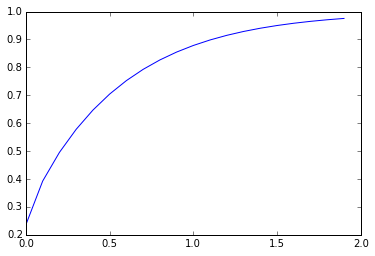

In [33]:
plt.plot(np.arange(0.,2.0,0.1),fld);

In [34]:
alphap, Ap = FluidQueue(Q, Rin, Rout, "flDistrPH")
print("PH representation of the fluid level distr:")
print(alphap)
print(Ap)
alpha, A = FluidQueue(Q, Rin, Rout, "flDistrME")
print("ME representation of the fluid level distr:")
print(alpha)
print(A)

PH representation of the fluid level distr:
[[ 0.63124379  0.13213332]]
[[ -2.03872923   0.414833  ]
 [ 12.10001665 -21.14310274]]
ME representation of the fluid level distr:
[[ 0.09903292  0.66434419]]
[[ -3.87388807   2.2652663 ]
 [ 16.20614683 -19.3079439 ]]


The stationary sojourn time distribution of the fluid drops can also be calculated. The corresponding performance measures are:
* "stDistr": the (cummulative) distribution function of the stationary sojourn time of the fluid drops at the given points,
* "stMoms": a given number of moments of the sojourn time,
* "stDistrME": the matrix-exponential representation of the sojourn time distribution,
* "stDistrPH": the phase-type representation of the sojourn time distribution.

In [35]:
std, stm = FluidQueue(Q, Rin, Rout, "stDistr", np.arange(0.,1.0,0.01), "stMoms", 3)
print("sojourn time moments=",stm)

sojourn time moments= [0.23252260678168307, 0.20068950224745297, 0.26683979953080317]


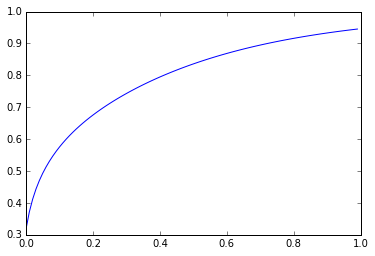

In [36]:
plt.plot(np.arange(0.,1.0,0.01),std);

In [37]:
betap, Bp = FluidQueue(Q, Rin, Rout, "stDistrPH")
print("PH representation of the sojourn time distr:")
print(betap)
print(Bp)
beta, B = FluidQueue(Q, Rin, Rout, "stDistrME")
print("ME representation of the sojourn time distr:")
print(beta)
print(B)

PH representation of the sojourn time distr:
[[ 0.24892566  0.03040312  0.068594    0.02340757  0.21435626  0.          0.
   0.          0.          0.          0.          0.09753155]]
[[ -21.23237537    2.488998      2.            0.            4.            0.
     0.            0.            1.            0.            2.            0.        ]
 [  72.60009991 -135.85861646    0.            2.            0.            4.
     0.            0.            0.            1.            0.            2.        ]
 [   6.            0.          -29.07745846    0.829666      5.            0.
     3.            0.            7.            0.            4.            0.        ]
 [   0.            6.           24.2000333   -67.28620549    0.            5.
     0.            3.            0.            7.            0.            4.        ]
 [   1.            0.            3.            0.           -4.            0.
     0.            0.            0.            0.            0.            

As we see, the PH and ME representations of the sojourn time are huge, which should be kept in mind when using it for large models.

Little formula is valid for continuous queues as well:

In [38]:
lambd = np.sum(CTMCSolve(Q)*Rin)
stm[0]*lambd - flm[0]

-5.55112e-17

### Fluid queues with independent input and arrival processes

If the background process modulating the input and output fluid rates are independent, the size of the PH and ME representations for the sojourn time distribution of fluid drops is much smaller (just like in case of the QBD queue vs. MAP/MAP/1 queue).

This is an important case, since the fluid output rate is constant in many applications, implying independent input and output processes.

The input process is given by $Q_{in},R_{in}$, and the output process by $Q_{out},R_{out}$. 

In [39]:
Qin = ml.matrix([[-2., 1., 1.],[2., -5., 3.],[4., 0., -4.]])
Rin = Diag(ml.matrix([[3.,7.,0.]]))
Qout = ml.matrix([[-4., 1., 3.],[6., -8., 2.],[3., 7., -10.]])
Rout = Diag(ml.matrix([[1.,7.,15.]]))

The performance measures are provided by function **FluFluQueue**. Apart from $Q_{in},R_{in},Q_{out},R_{out}$ it has an additional (mandatory) parameter, *srv0stop*.

* If *srv0stop=False*, then the background Markov chain of the fluid output process continues to evolve even if the queue is empty, and there is no fluid to serve.
* If *srv0stop=True*, the Markov chain of the output process stops if no fluid is available to serve (and slows down if there is less avaliable than it can serve with the current rate).

The *srv0stop=True* is the continuous counterpart of the MAP/MAP/1 queue, where the MAP of the service process is frozen if the queue is empty. Setting *srv0stop=Flase* the output process can be interpreted as a random environment for the fluid output rate, that does not depend on the current fluid level.

If the fluid output process is deterministic (constant output rate), these options do not make a difference.

*FluFluQueue* calculates the same performance measures as *FluidQueue*.

In [40]:
fld, flm = FluFluQueue(Qin, Rin, Qout, Rout, False, "flDistr", np.arange(0.,2.5,0.1), "flMoms", 3)
print("fluid level moments=",flm)

fluid level moments= [0.53570356276760078, 1.0765385576008903, 3.4298090557057193]


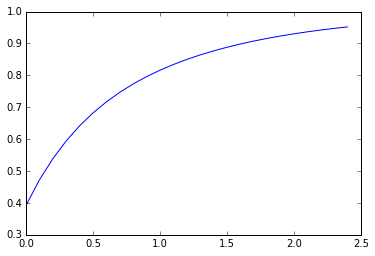

In [41]:
plt.plot(np.arange(0.,2.5,0.1),fld);

The ME and PH representations for the fluid level distribution are calculated as in the dependent case (*FluidQueue*), the underlying computational procedure is the same, too.

In [42]:
alphap, Ap = FluFluQueue(Qin, Rin, Qout, Rout, False, "flDistrPH")
print("PH representation of the fluid level distr:")
print(alphap)
print(Ap)
alpha, A = FluFluQueue(Qin, Rin, Qout, Rout, False, "flDistrME")
print("ME representation of the fluid level distr:")
print(alpha)
print(A)

PH representation of the fluid level distr:
[[ 0.45573246  0.15246666]]
[[-2.34045752  0.53196665]
 [ 0.92130945 -1.25591807]]
ME representation of the fluid level distr:
[[-0.65560575  1.26380488]]
[[-2.14252917  1.51937881]
 [ 0.4380681  -1.45384643]]


In the calculation of the stationary sojourn time distribution of the fluid drops, however, there is a signifficant difference. The representations are much smaller, making this function capable of solving large models (up to several hundreds of states).

In [46]:
std, stm = FluFluQueue(Qin, Rin, Qout, Rout, False, "stDistr", np.arange(0.,1.01,0.01), "stMoms", 3)
print("sojourn time moments=",stm)

sojourn time moments= [0.19480129555185471, 0.1128710807256384, 0.10068642773107296]


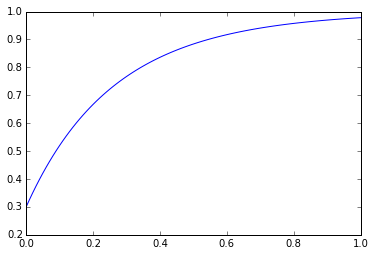

In [47]:
plt.plot(np.arange(0.,1.01,0.01),std);

In [48]:
betap, Bp = FluFluQueue(Qin, Rin, Qout, Rout, False, "stDistrPH")
print("PH representation of the sojourn time distr:")
print(betap)
print(Bp)
beta, B = FluFluQueue(Qin, Rin, Qout, Rout, False, "stDistrME")
print("ME representation of the sojourn time distr:")
print(beta)
print(B)

PH representation of the sojourn time distr:
[[ 0.45285051  0.24877407]]
[[-5.49734397  0.8367526 ]
 [ 1.44916617 -3.79142652]]
ME representation of the sojourn time distr:
[[ 0.18114021  0.52048438]]
[[-6.36684367  1.6656012 ]
 [-0.6164326  -2.92192682]]


The compact representation is clearly visible, much smaller than the one we got in the *FluidQueue* case.

Let us check Little formula for this system as well.

In [49]:
lambd = np.sum(CTMCSolve(Qin)*Rin)
stm[0]*lambd - flm[0]

-3.33067e-16

Up to this point the *srv0stop* parameter was set to *False*. Everything can be done similarly if it is set to *True* as well.